In [15]:
%matplotlib inline 

In [16]:
import time
import datetime
import requests as rq
import csv
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from time import sleep

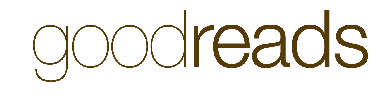

In [17]:
# show the goodreads website logo to fit the rule
img=mpimg.imread('goodreads_logo.png')
#print(img.shape)
plt.imshow(img) # show image
plt.axis('off') # set axis invisable
plt.show()

In [18]:
#init variables
domain = "https://goodreads.com"
books = {}
exlinks = []
desc = []
status = []
timestamp = []
numberofpages = 100 # from 1 to 100
lines = []
blocks=[]

In [19]:
def check_link_status(link):
    statuscheck = rq.get(link)
    if(statuscheck.status_code is 200):
        return True
    else:
        return False

In [20]:
# Domain from goodreads, only allowed 1 request per second with or without api.
# create a get request
#r = rq.get('https://www.goodreads.com/list/show/7.Best_Books_of_the_21st_Century?page=1')
r = rq.get('https://www.goodreads.com/book/show/25899336-when-breath-becomes-air')

In [21]:
# 
print(r.status_code)
type(r.status_code)

200


int

In [22]:
# set the request comtent to a bs4 type decoded via html5lib
content = r.content
soup = BeautifulSoup(content, "html5lib")

In [23]:
soup.title

<title>
When Breath Becomes Air by Paul Kalanithi
</title>

In [24]:
for block in soup.find_all('a'):
    link = block.get('href')
    if link is not None and link.startswith('http') and 'https://www.goodreads.com' not in link:
        blocks.append(block)
        exlinks.append(link)
        print(block)

<a href="http://www.nytimes.com/2016/01/26/health/lucy-paul-kalanithi-interview-breath-becomes-air.html?mabReward=A6&amp;action=click&amp;pgtype=Homepage&amp;region=CColumn&amp;module=Recommendation&amp;src=rechp&amp;WT.nav=RecEngine&amp;_r=0" rel="nofollow" target="_blank">http://www.nytimes.com/2016/01/26/hea...</a>
<a href="http://s1341.photobucket.com/user/irisper01/media/556069_1280x720_zpsbfrek8oe.jpg.html" rel="nofollow" target="_blank"> <img alt=" photo 556069_1280x720_zpsbfrek8oe.jpg" class="gr-hostedUserImg" src="https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/hostedimages/1453666346i/17856881._SX540_.jpg"/></a>
<a href="http://www.nytimes.com/2016/01/26/health/lucy-paul-kalanithi-interview-breath-becomes-air.html?mabReward=A6&amp;action=click&amp;pgtype=Homepage&amp;region=CColumn&amp;module=Recommendation&amp;src=rechp&amp;WT.nav=RecEngine&amp;_r=0" rel="nofollow" target="_blank">http://www.nytimes.com/2016/01/26/hea...</a>
<a href="http://s1341.photobucket.

In [25]:
# Use BS to find all <a> tab with attribute "class=bookTitle"
#bookblock = soup.find_all('a', attrs={"class": "bookTitle"})

In [26]:
#print(len(bookblock))
#print(bookblock[0].span)
# NavigableString type to encapsulate string in tag
#print(bookblock[0].span.string)
#print(bookblock[0].attrs['href'])
#print(time.time())
#print(datetime.datetime.now())

In [27]:
for i in range(len(exlinks)):
    #link = domain + bookblock[i].attrs['href']
    desc.insert(i,blocks[i].text)
    status.insert(i, check_link_status(exlinks[i]))
    timestamp.insert(i, time.time())
    books[i] = (i, {"link":exlinks[i], "desc":desc[i], "status":str(status[i]), "timestamp":str(timestamp[i])})
    line = [exlinks[i], desc[i], str(status[i]), str(timestamp[i])]
    lines.insert(i, line)
    print(exlinks[i] + "," + desc[i] + "," + str(status[i]))
#print(exlinks)

http://www.nytimes.com/2016/01/26/health/lucy-paul-kalanithi-interview-breath-becomes-air.html?mabReward=A6&action=click&pgtype=Homepage&region=CColumn&module=Recommendation&src=rechp&WT.nav=RecEngine&_r=0,http://www.nytimes.com/2016/01/26/hea...,True
http://s1341.photobucket.com/user/irisper01/media/556069_1280x720_zpsbfrek8oe.jpg.html, ,True
http://www.nytimes.com/2016/01/26/health/lucy-paul-kalanithi-interview-breath-becomes-air.html?mabReward=A6&action=click&pgtype=Homepage&region=CColumn&module=Recommendation&src=rechp&WT.nav=RecEngine&_r=0,http://www.nytimes.com/2016/01/26/hea...,True
http://s1341.photobucket.com/user/irisper01/media/556069_1280x720_zpsbfrek8oe.jpg.html,
  ,True
http://s1341.photobucket.com/user/irisper01/media/IMG_00468_zps504xcdb8.jpg.html,
  ,True
http://itseithersadnessoreuphoria.blogspot.com,http://itseithersadnessoreuphoria.blo...,True
http://timesofindia.indiatimes.com/life-style/books/features/Review-When-Breath-Becomes-Air/articleshow/54308988.cms,http:/

In [30]:
with open('exlinks.csv', "w") as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    #fieldnames = 'link, desc, status, timestamp'
    writer.writerow(["link", "desc", "status", "timestamp"])
    for i in range(len(exlinks)):
        writer.writerow(lines[i])